Import libraries and dependencies

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

Importing boston house dataset

In [57]:
house_price_dataset = pd.read_csv("Boston.csv")
print(house_price_dataset.head())


   rownames     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0         1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1         2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2         3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3         4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4         5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2

[5 rows x 15 columns]


In [58]:
print(house_price_dataset.shape)

(506, 15)


Check for missig values

In [59]:
house_price_dataset.isnull().sum()

rownames    0
crim        0
zn          0
indus       0
chas        0
nox         0
rm          0
age         0
dis         0
rad         0
tax         0
ptratio     0
black       0
lstat       0
medv        0
dtype: int64

Data visualization - Correlation Matrix, Heatmap, Scatterplot, Histogram

In [60]:
# correlation matrix
correlation_matrix = house_price_dataset.corr(numeric_only=True)
print(correlation_matrix)

          rownames      crim        zn  ...     black     lstat      medv
rownames  1.000000  0.407407 -0.103393  ... -0.295041  0.258465 -0.226604
crim      0.407407  1.000000 -0.200469  ... -0.385064  0.455621 -0.388305
zn       -0.103393 -0.200469  1.000000  ...  0.175520 -0.412995  0.360445
indus     0.399439  0.406583 -0.533828  ... -0.356977  0.603800 -0.483725
chas     -0.003759 -0.055892 -0.042697  ...  0.048788 -0.053929  0.175260
nox       0.398736  0.420972 -0.516604  ... -0.380051  0.590879 -0.427321
rm       -0.079971 -0.219247  0.311991  ...  0.128069 -0.613808  0.695360
age       0.203784  0.352734 -0.569537  ... -0.273534  0.602339 -0.376955
dis      -0.302211 -0.379670  0.664408  ...  0.291512 -0.496996  0.249929
rad       0.686002  0.625505 -0.311948  ... -0.444413  0.488676 -0.381626
tax       0.666626  0.582764 -0.314563  ... -0.441808  0.543993 -0.468536
ptratio   0.291074  0.289946 -0.391679  ... -0.177383  0.374044 -0.507787
black    -0.295041 -0.385064  0.175520

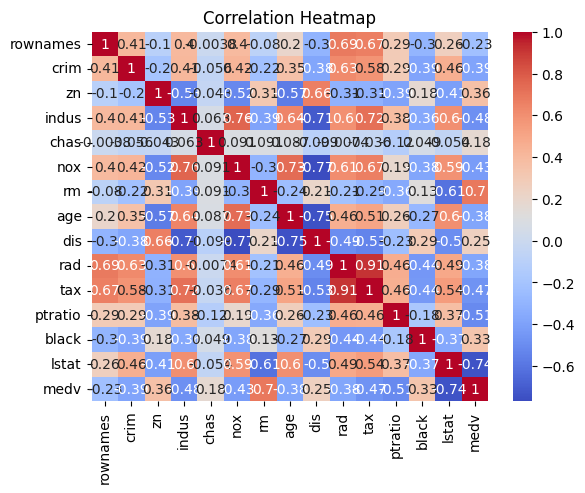

In [61]:
# Heatmap

corr = house_price_dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ValueError: num must be an integer with 1 <= num <= 12, not 13

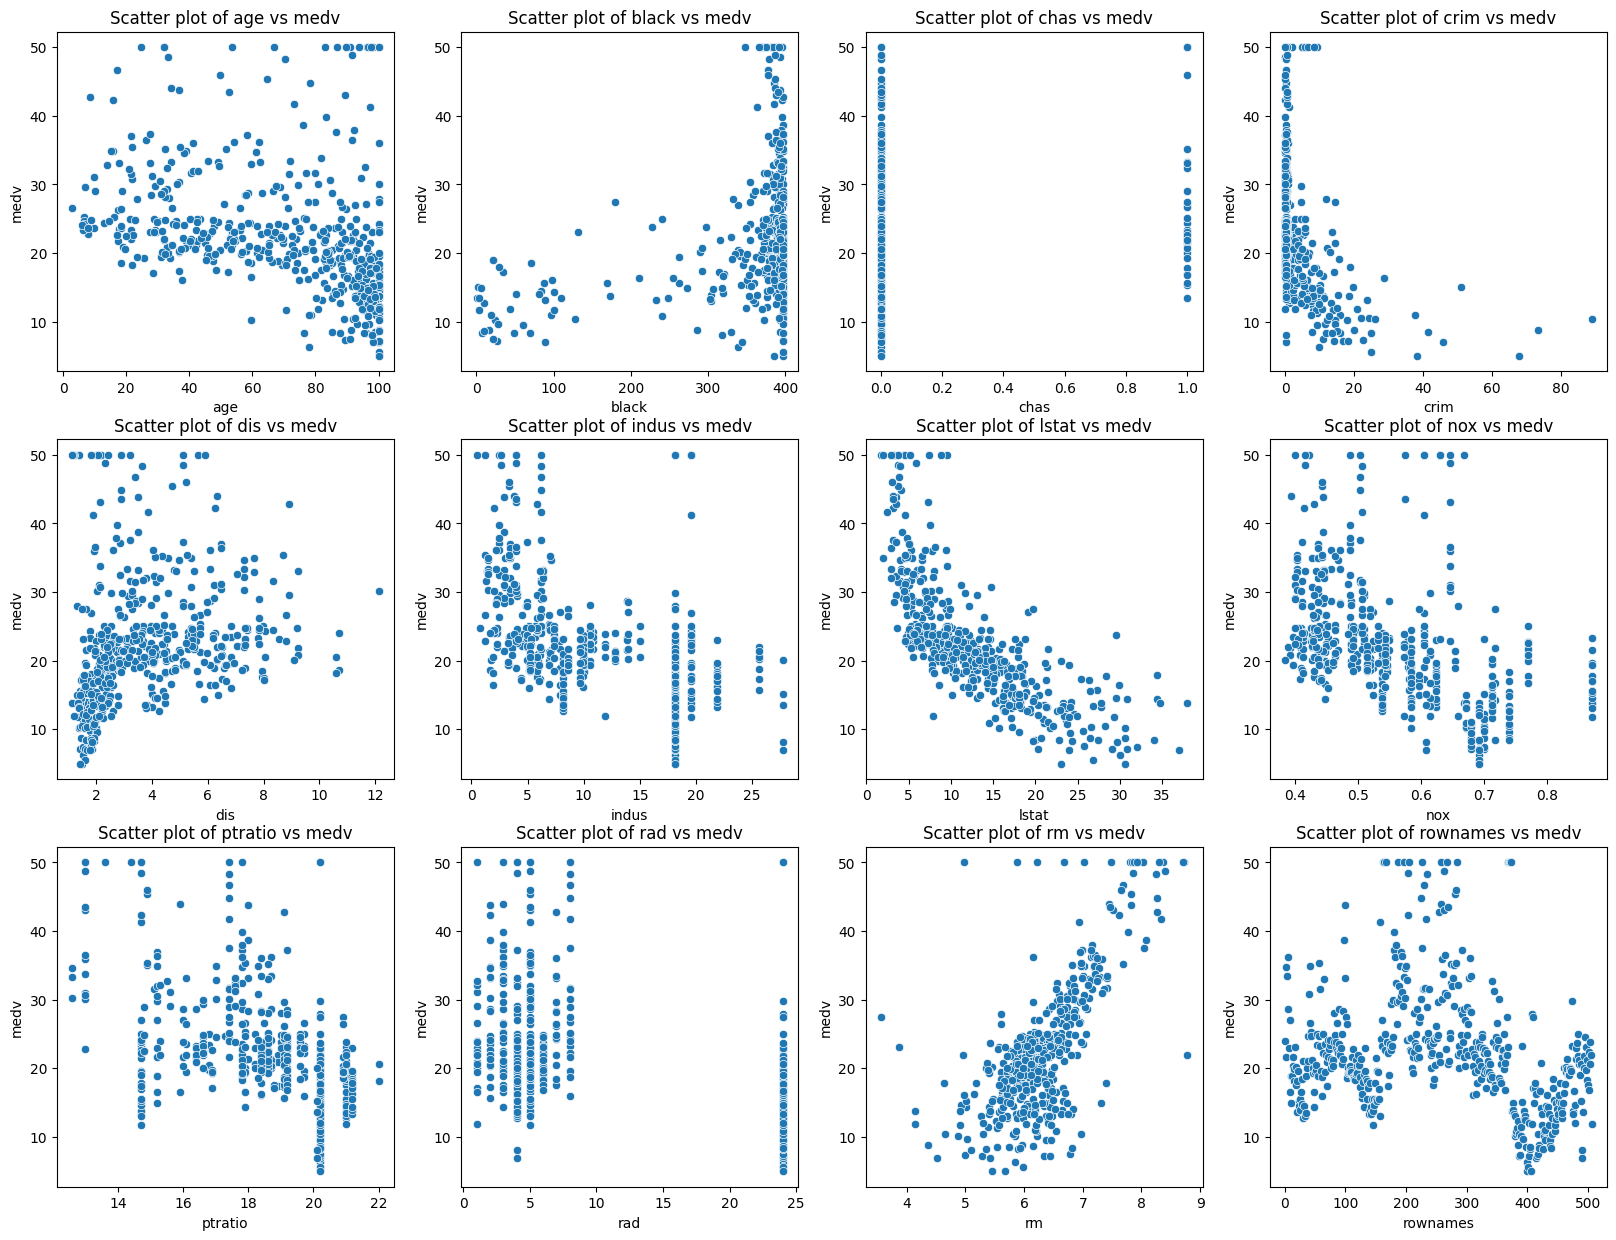

In [62]:
# scatter plot
features = house_price_dataset.columns.difference(['medv'])

plt.figure(figsize=(20, 15))

for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=house_price_dataset[feature], y=house_price_dataset['medv'])
    plt.title(f'Scatter plot of {feature} vs medv')
    plt.xlabel(feature)
    plt.ylabel('medv')
plt.tight_layout()
plt.show()

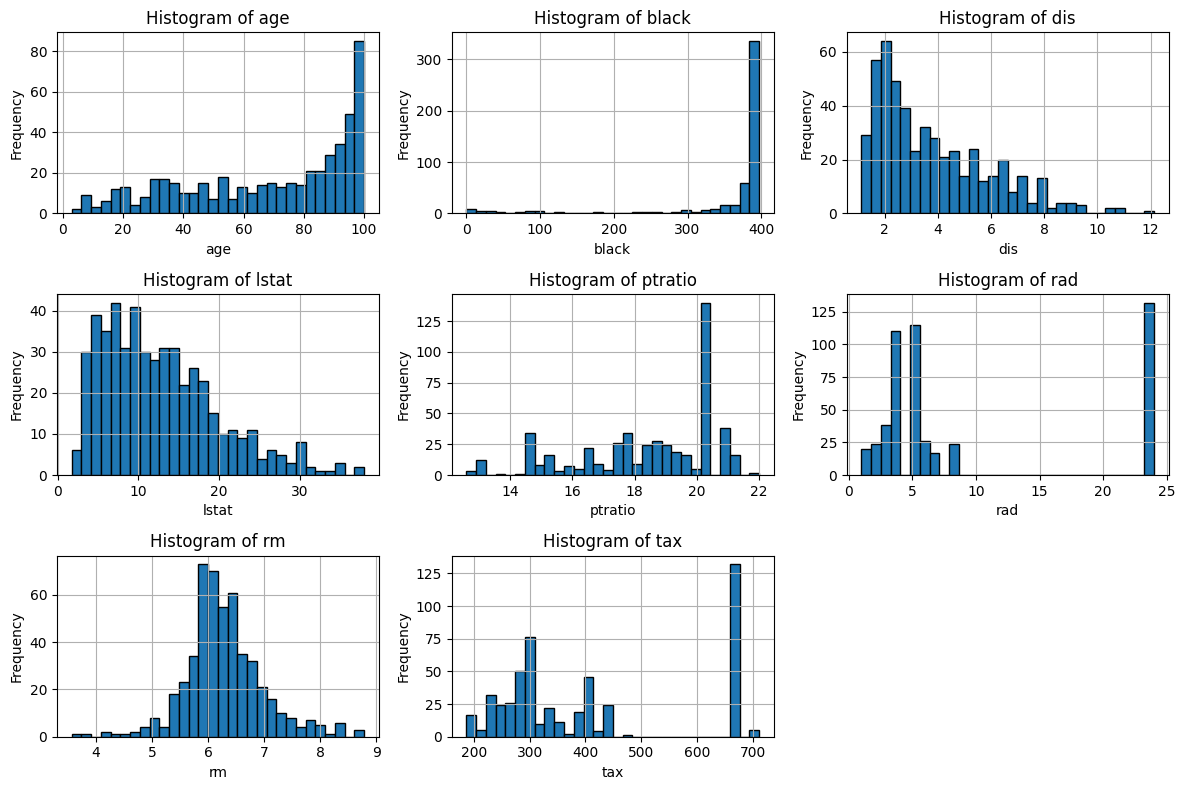

In [ ]:
# histogram
plt.figure(figsize=(12,8))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    house_price_dataset[feature].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Train Model

In [ ]:
features

Index(['age', 'black', 'dis', 'lstat', 'ptratio', 'rad', 'rm', 'tax'], dtype='object')

Seperating training and testing data

In [ ]:
features = house_price_dataset.drop(columns=['medv'])
target = house_price_dataset['medv']

In [ ]:
features.shape

(506, 8)

In [ ]:
target.shape

(506,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=42)
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (404, 8)
Test set shape: (102, 8)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Accuracy Check

In [ ]:
test_data_predictions = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, test_data_predictions)
r2 = r2_score(y_test, test_data_predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 27.22003603369625
R-squared: 0.628819967269552
